## Flight Price: 
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('flight_price.xlsx')

In [3]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
data.shape
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 10683 rows and 11 columns.


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

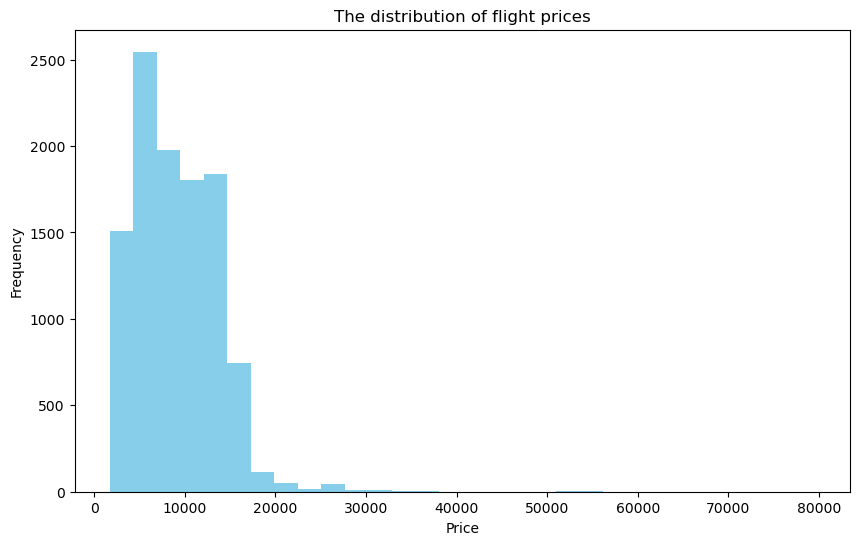

In [5]:
plt.figure(figsize=(10,6))
plt.hist(data['Price'], bins = 30 , color = 'skyblue')
plt.title('The distribution of flight prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price? 

In [6]:
flight_price = data['Price']

max_price = flight_price.max()
min_price = flight_price.min()

flight_range = max_price-min_price
print(f'The minmum price is : {min_price}')
print(f'The maximum price is : {max_price}')
print(f'The range of price is {flight_range}')

The minmum price is : 1759
The maximum price is : 79512
The range of price is 77753


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

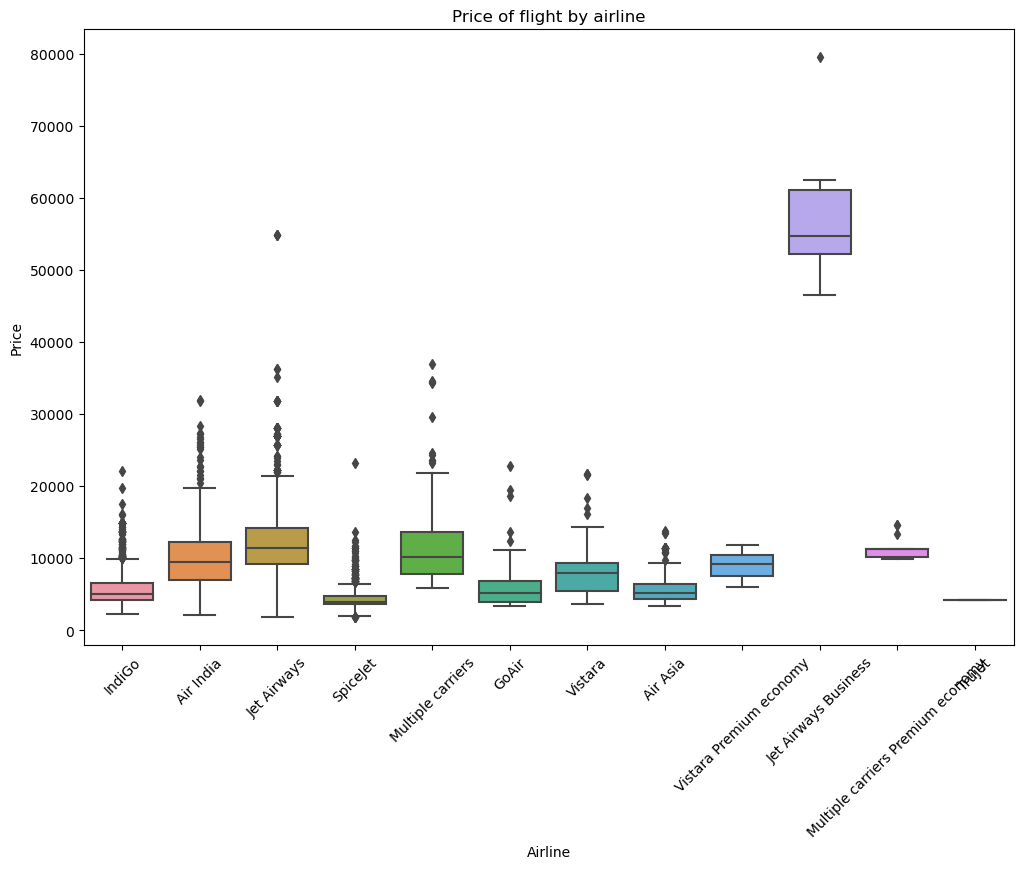

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data, x = 'Airline', y = 'Price')
plt.title('Price of flight by airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)


Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Outlier Rows: [  123   396   486   510   597   628   657   785   826   936   946   959
   975  1196  1246  1341  1424  1466  1478  1629  1654  1785  1918  2055
  2099  2108  2495  2556  2618  2635  2693  2924  3032  3111  3257  3400
  3535  3700  4012  4521  4829  5013  5136  5372  5439  5662  5701  5710
  5719  5738  5745  5856  5986  6314  6407  6576  6588  6605  6991  7351
  7356  7377  7537  7554  7617  7713  7724  7756  7902  8020  8080  8451
  8470  8536  8598  8940  8957  8990  9019  9193  9239  9632  9715  9974
 10052 10113 10160 10182 10189 10353 10364 10383 10439 10511]
Outlier Columns: [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


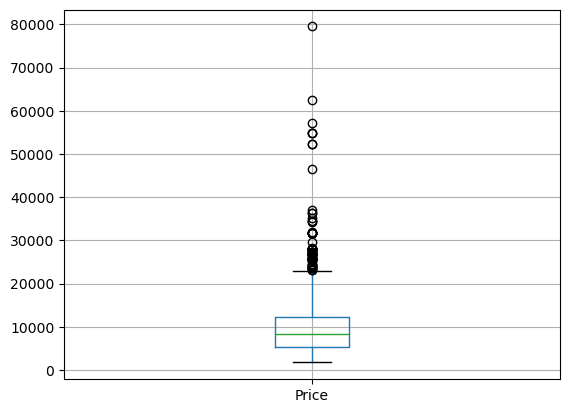

In [8]:


# Create a box plot to visualize the data distribution
data.boxplot()

# Calculate the first quartile (Q1) and third quartile (Q3) using pandas
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Get the rows and columns where outliers are present
outlier_rows, outlier_columns = pd.np.where(outliers)

# Print the outlier rows and columns
print("Outlier Rows:", outlier_rows)
print("Outlier Columns:", outlier_columns)

 In this example, outlier_rows and outlier_columns will contain the indices of the rows and columns where outliers are present in the dataset.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

In [9]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [10]:
data['peak_season'] = data['Date_of_Journey'].str.split('/').str[1]
data['peak_season']

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: peak_season, Length: 10683, dtype: object

In [11]:
data['peak_season'].dtypes

dtype('O')

In [12]:
data['peak_season'].astype(int)

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: peak_season, Length: 10683, dtype: int64

<AxesSubplot: xlabel='peak_season', ylabel='Count'>

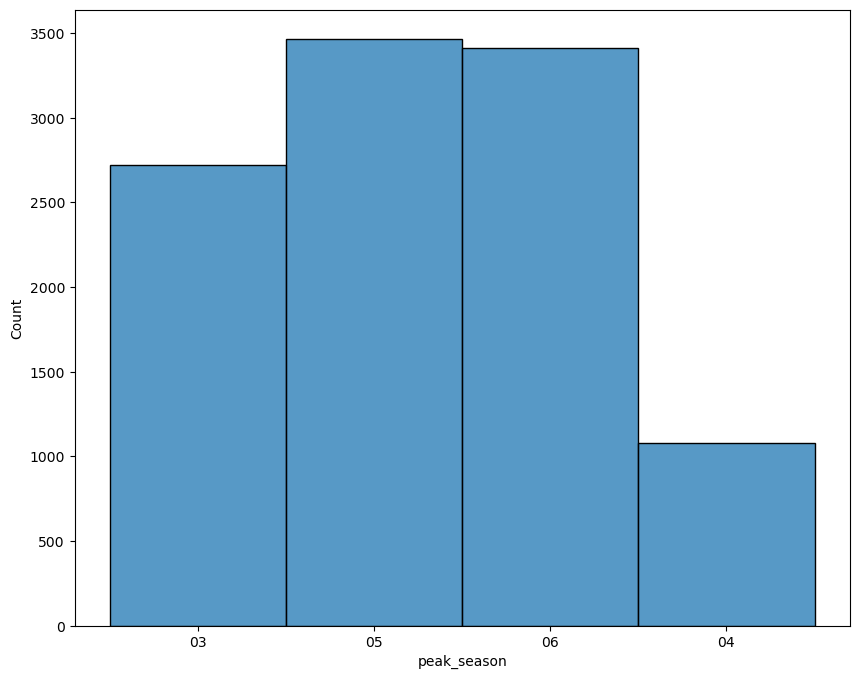

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(data['peak_season'])

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,peak_season
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03


In [15]:
data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [16]:
data['Date'] = pd.to_datetime(data['Date_of_Journey'], format = '%d/%m/%Y')
data['Date']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date, Length: 10683, dtype: datetime64[ns]

In [17]:
data_monthly = data.groupby(pd.Grouper(key='Date', freq='M')).mean()
data_monthly

,Price
Date,
2019-03-31,10673.205580
2019-04-30,5770.847081
2019-05-31,9127.247548
2019-06-30,8828.796134


Text(0.5, 1.0, 'Price trends according to months')

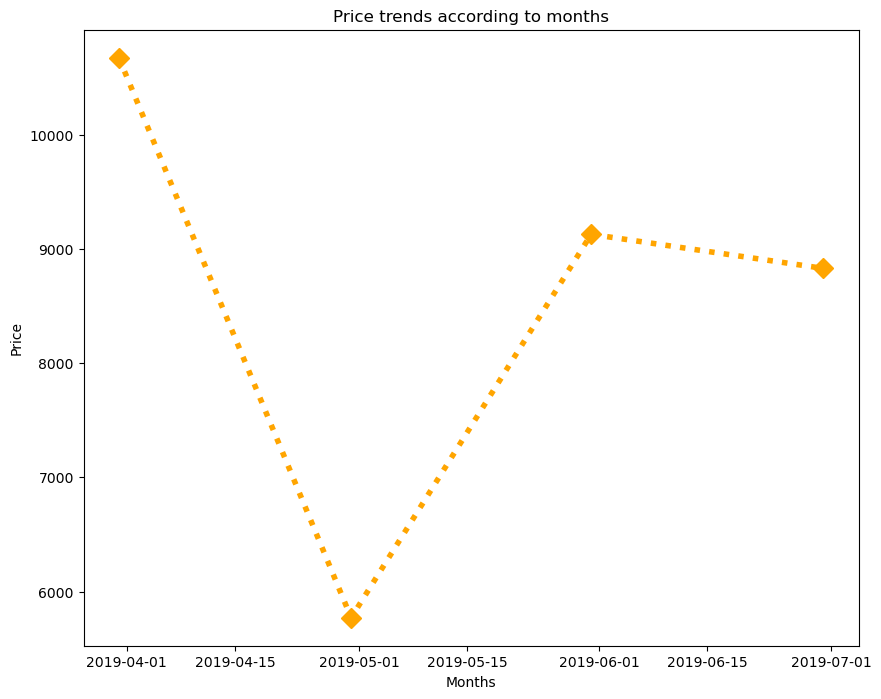

In [18]:
plt.figure(figsize=(10,8))
plt.plot(data_monthly.index, data_monthly['Price'], color='orange', linewidth=4, linestyle='dotted', marker='D' , markersize=10)
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Price trends according to months')

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?


To identify the factors that affect flight prices from the Flight Price dataset, you can perform a comprehensive analysis by considering various features and their impact on flight prices. Here are some key features to analyze:

- Date or Time: Investigate how flight prices change over time. This includes looking at seasonal patterns, trends, and any price fluctuations during specific periods.

- Airline: Compare flight prices across different airlines to understand how pricing strategies vary between carriers.

- Source and Destination: Analyze price differences for different routes and identify popular and high-demand destinations.

- Duration: Examine how flight prices are affected by the duration of the flights.

- Number of Stops: Investigate the relationship between the number of stops and flight prices.

- Day of the Week: Check if flight prices vary depending on the day of the week.

- Month of the Year: Look for patterns in flight prices based on the month of the year.

- Holidays and Special Events: Identify price fluctuations around holidays and special events.

- Advance Booking: Analyze how booking in advance or last-minute booking affects flight prices.

- Cabin Class: Compare flight prices across different cabin classes (e.g., economy, business, first class).

- Competitor Prices: Explore how prices offered by competitors influence flight prices.

- Presentation of Findings to Management:

When presenting your findings to the management team, it's essential to provide a clear and concise overview of the factors affecting flight prices. Here's how you can present your findings effectively:

- Executive Summary: Begin with an executive summary that highlights the main findings and key factors influencing flight prices.

- Data Visualization: Use various types of data visualizations (e.g., line plots, bar charts, scatter plots, heatmaps) to illustrate trends and relationships between flight prices and different features.

- Impact Analysis: Analyze the impact of each factor on flight prices. For example, describe how flight prices change during peak seasons, holidays, or based on airlines' pricing strategies.

- Insights and Recommendations: Provide actionable insights based on your analysis. Highlight the most influential factors and recommend potential strategies to optimize pricing and improve revenue.

- Comparison with Competitors: If possible, include a comparison of your airline's prices with competitors to understand the competitive landscape and adjust pricing strategies accordingly.

- Modeling and Predictive Analysis: If applicable, discuss any modeling or predictive analysis conducted to forecast flight prices based on the identified factors.

- Limitations and Assumptions: Address any limitations in the analysis, such as data availability or the scope of the dataset. Explain any assumptions made during the analysis.

- Conclusion: Summarize the key findings and emphasize the actionable insights that can be used to optimize pricing strategies and improve the airline's competitive position.

- Interactive Dashboard (Optional): Consider creating an interactive dashboard that allows the management team to explore the data and analyze flight prices based on different factors.

## Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have? 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [20]:
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [21]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [22]:
df1.shape


num_rows,num_columns = df1.shape

print(f'The dataset has {num_rows} rows and {num_columns} columns')

The dataset has 10841 rows and 13 columns


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

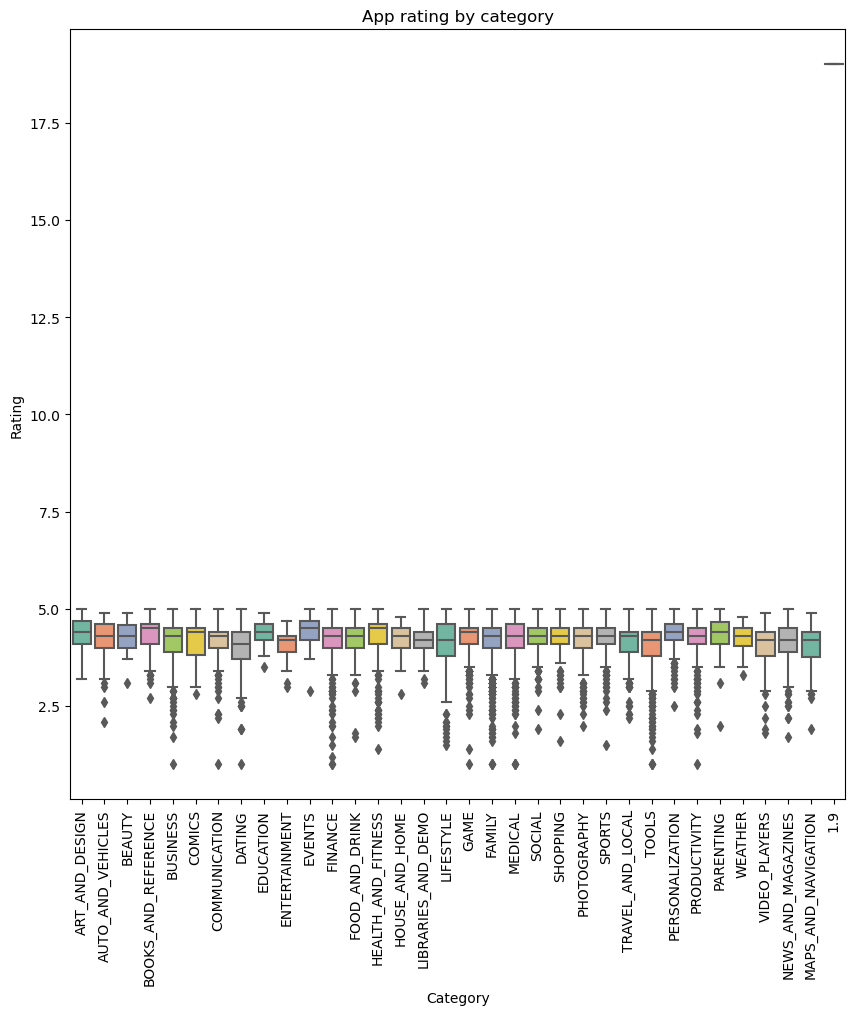

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df1.Category, y=df1.Rating, data= df1,palette='Set2')
plt.title('App rating by category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis. 

In [24]:
##Checking missing values

df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Observation
there have missing values in a dataset

The impact of missing values on your analysis depends on the specific tasks and questions you want to address using the dataset. Here are some potential impacts:

- Biased Analysis: If the missing values are not handled properly, it may lead to biased analysis, as the missing data might have specific patterns or reasons for being missing. Ignoring missing values without considering the underlying reasons could skew your results.

- Reduced Sample Size: The presence of missing values reduces the effective sample size for analysis. A smaller sample size may affect the generalizability of your findings and reduce the statistical power of your analysis.

- Misinterpretation of Relationships: Missing data may alter the relationships between variables and lead to incorrect conclusions about the relationships between different features.

- Rating Analysis: Since the 'Rating' column has a substantial number of missing values, any analysis related to app ratings might be impacted. For instance, if you were to analyze the average rating of apps in different categories or content ratings, the missing values could skew the results.

- Version Analysis: The 'Current Ver' and 'Android Ver' columns, which contain version information, have missing values. This could impact any analysis related to app version distributions or comparing app performance based on different version

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

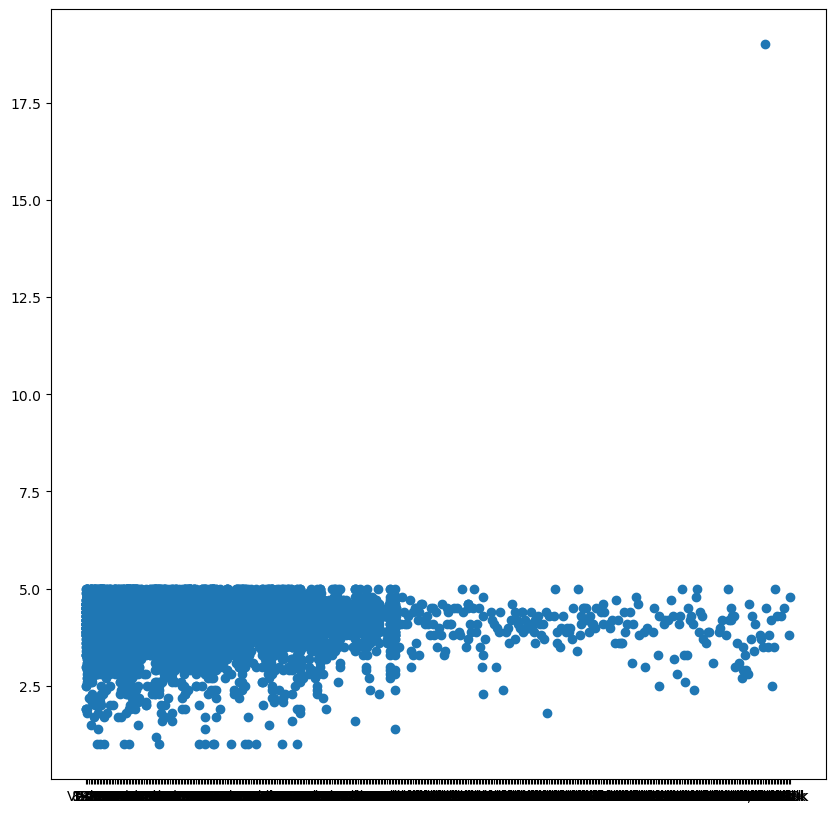

In [25]:

plt.figure(figsize=(10,10))
plt.scatter(x=df1['Size'],y=df1['Rating'])

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [32]:
df1.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [46]:
df1.info()
 
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df1['Price'] = pd.to_numeric(df1['Category'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10040 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           1 non-null      float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


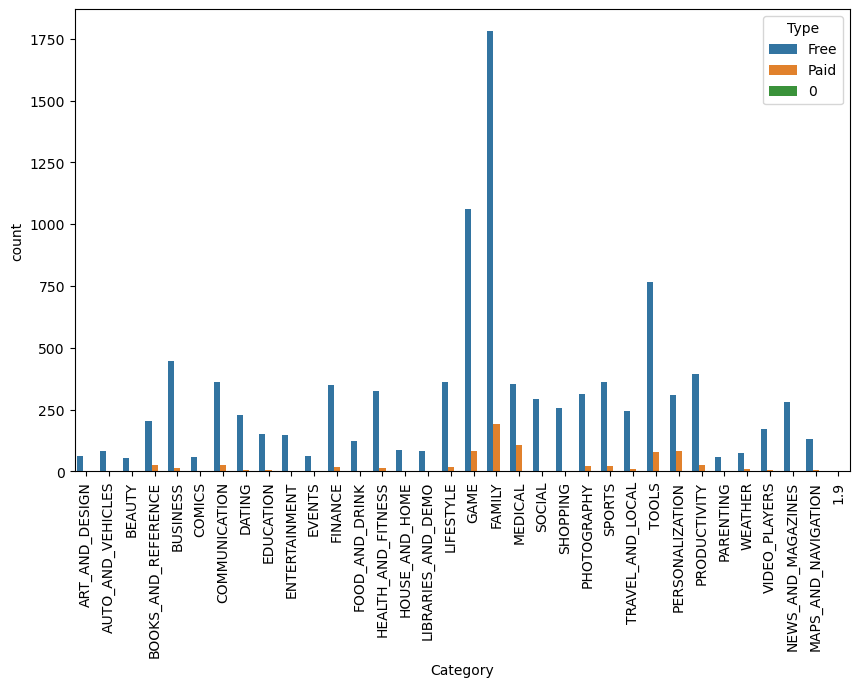

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x=df1['Category'] ,hue='Type')
plt.xticks(rotation=90)
plt.show()

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [55]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,NaN,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,NaN,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [58]:
Category = pd.DataFrame(df1['Category'].value_counts())
Category.rename(columns={'Category' : 'Count'}, inplace=True)


In [60]:
Category

,Count
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382
